In [9]:
import torch
from torch.autograd import Variable
x = torch.Tensor(5)
torch.Tensor(2,2,2)


(0 ,.,.) = 
1.00000e-38 *
   0.0000  0.0000
   1.3215  0.0000

(1 ,.,.) = 
1.00000e-38 *
   5.1269  0.0000
   5.1269  0.0000
[torch.FloatTensor of size 2x2x2]

In [23]:
x= torch.ones(2)*2
v = Variable(x,requires_grad=True)
v2 = v*10
v2.backward(torch.ones(2)*1)

print v
print v.grad

Variable containing:
 2
 2
[torch.FloatTensor of size 2]

Variable containing:
 10
 10
[torch.FloatTensor of size 2]



In [13]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,N=10):
        super(Net, self).__init__()
        self.W = Parameter(torch.rand(N))
        self.B = Parameter(torch.rand(N))
        
    def forward(self,x):
        return self.W*x+self.B

torch.manual_seed(123)
net = Net()
list(net.parameters())
x = net.forward(Variable(torch.ones(10)))
x.mean()

Variable containing:
 1.0796
[torch.FloatTensor of size 1]

In [ ]:
import xml.etree.ElementTree as ET
def LoadObjectsFromImageNetXML(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objs = root.findall('object')
    allobjs = []
    for obj in objs:
        bndbox = obj.find('bndbox')
        box = [[int(bndbox.find('xmin').text),int(bndbox.find('xmax').text)],
               [int(bndbox.find('ymin').text),int(bndbox.find('ymax').text)]]
        allobjs.append(Object(box))
    return allobjs

In [29]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches

class Frame:
    def __init__(self,image_path='',objects=[]):
        self.image_path = image_path
        self.objects = objects
        
    def LoadImage(self):
        assert os.path.isfile(self.image_path), "cant open file: %s" % self.image_path
        pil_im = Image.open(fp, 'r')
        self.image = np.asarray(pil_im)
        
    def ShowRawImage(self):
        pass

    def ShowImage(self):
        # Create figure and axes
        fig,ax = plt.subplots(1,figsize=(15, 8))
        ax.imshow(self.image)
        for obj in self.objects:
            rect = patches.Rectangle(obj.box.XYmin(),obj.box.Edges()[0],obj.box.Edges()[1],linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
        plt.show()
        
class Box:
    def __init__(self,xmin,xmax,ymin,ymax):
        assert xmax>xmin and ymax>ymin, "xmax>xmin and ymax>ymin!"
        self.xmin=xmin
        self.xmax=xmax
        self.ymin=ymin
        self.ymax=ymax
    
    @classmethod
    def FromDoubleArray(cls,box):
        return cls(box[0][0],box[0][1],box[1][0],box[1][1])
    
    def XYmin(self):
        return (self.xmin,self.ymin)
    
    def Edges(self):
        return (self.xmax-self.xmin,self.ymax-self.ymin)
    
    def Area(self):
        return (self.xmax-self.xmin)*(self.ymax-self.ymin)
        
# and Object contains an id,box,and type
class Object:
    def __init__(self,box,unique_id=-1,obj_type='head'):
        self.box = box
        self.unique_id = unique_id
        self.obj_type = obj_type
        
    @classmethod
    def FromDict(cls,objdict):
        #print objdict
        box = Box(objdict['box']['min'][0],objdict['box']['max'][0],objdict['box']['min'][1],objdict['box']['max'][1])
        uid = objdict['unique_identifier']
        obj_type = objdict['attributes']['type']
        return cls(box,uid,obj_type)
        


init mongoclient, found these dbs: [u'detection', u'local']
[ObjectId('57ffb8dba4ace136964c1ff1')]
210


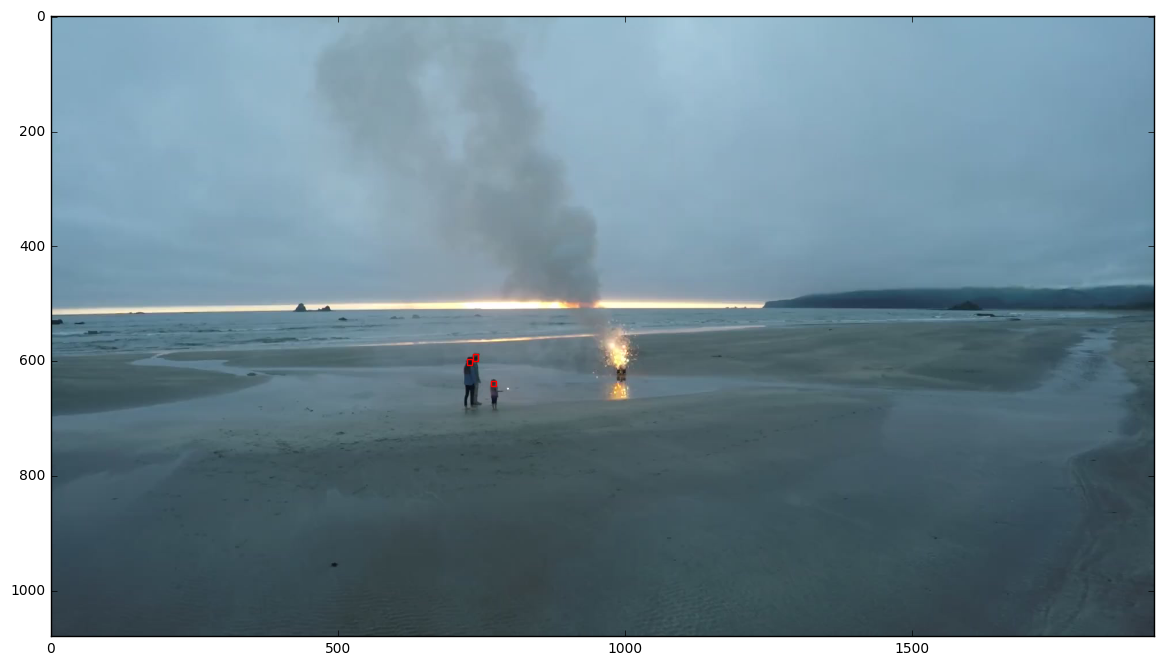

In [28]:
from mongo import mongo_connection as ML
import os

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline
CL = ML.PilotMongo()
frame_loader = ML.FrameLoader()
print CL.get_all_sets_ids()
setid = '57ffb8dba4ace136964c1ff1'
frame0 = CL.get_frames_from_set(setid)[0]

fp,objs = CL.get_framepath_objects(str(frame0['_id']))

aframe = Frame(image_path=fp,objects=[Object.FromDict(obj) for obj in objs])
aframe.LoadImage()
aframe.ShowImage()
#os.path.isfile(fp)

#pil_im = Image.open(fp, 'r')
#imshow(np.asarray(pil_im))
